# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
cd /gdrive/My Drive/ThinkStats2/code

/gdrive/My Drive/ThinkStats2/code


In [3]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [ ]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [ ]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [ ]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [ ]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [ ]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [ ]:
hist[4]

0

The `Values` method returns the values:

In [ ]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [ ]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [ ]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

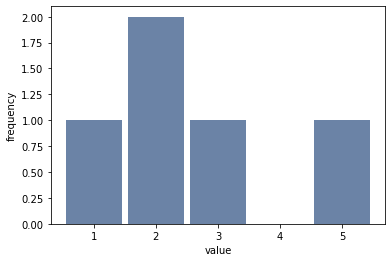

In [6]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [7]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

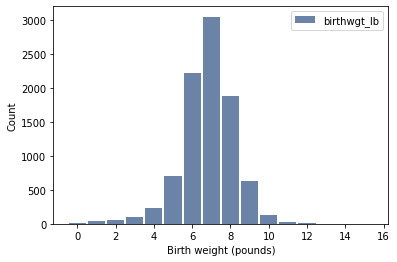

In [ ]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [ ]:
ages = np.floor(live.agepreg)

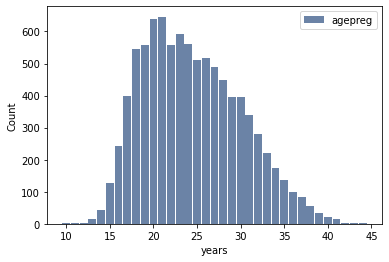

In [ ]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

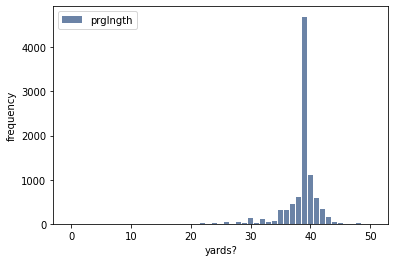

In [ ]:
# Solution goes here
lengths = np.floor(live.prglngth)
thinkplot.Hist(thinkstats2.Hist(lengths, label='prglngth'))
thinkplot.Config(xlabel='yards?', ylabel='frequency')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [ ]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [ ]:
# Solution goes here
for w, f in hist.Largest(5):
    print(f'{w} weeks has the frequency of {f}')

44.0 weeks has the frequency of 1
43.0 weeks has the frequency of 1
42.0 weeks has the frequency of 2
41.0 weeks has the frequency of 14
40.0 weeks has the frequency of 21


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [ ]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

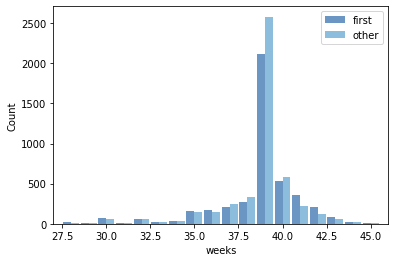

In [ ]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [ ]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [ ]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [ ]:
# Solution goes here
np.sqrt(var) == std

True

Here's are the mean pregnancy lengths for first babies and others:

In [ ]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [ ]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [14]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [15]:
# Solution goes here
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [12]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.totalwgt_lb.round(), label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb.round(), label='other')

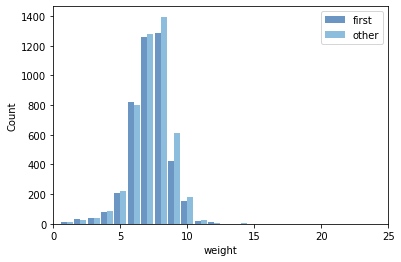

In [13]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weight', ylabel='Count', 
                 xlim=[0, 25]
                 )

In [18]:
firsts.sample()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,...,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
7100,6441,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1103.0,NaN,1094.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1103.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8291.06027,9086.705939,16582.329669,2,7,NaN,8.25


In [19]:
# Solution goes here
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

It seems that first babies tend to be slightly lighter than others whereas they tend to be a bit longer.


For the next few exercises, we'll load the respondent file:

In [20]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [21]:
# Solution goes here
hist = thinkstats2.Hist(resp.totincr)

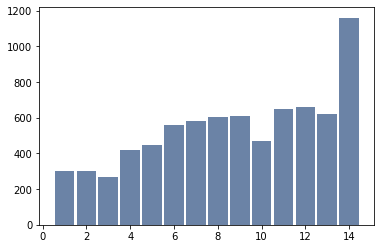

In [22]:
thinkplot.hist(hist)

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

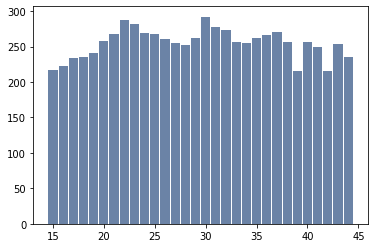

In [23]:
# Solution goes here
thinkplot.hist(thinkstats2.Hist(resp.age_r))

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

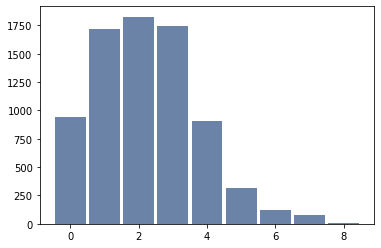

In [24]:
# Solution goes here
thinkplot.hist(thinkstats2.Hist(resp.numfmhh))

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

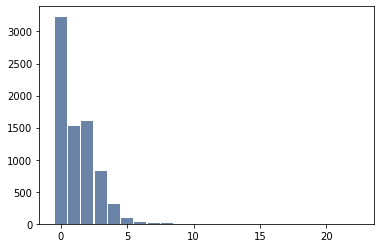

In [25]:
# Solution goes here
thinkplot.hist(thinkstats2.Hist(resp.parity))

In [26]:
resp.parity.describe()

count    7643.000000
mean        1.223211
std         1.389722
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        22.000000
Name: parity, dtype: float64

In [29]:
resp[resp.parity == 9]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,marstat,fmarstat,fmarit,evrmarry,hisp,hispgrp,numrace,roscnt,hplocale,manrel,fl_rage,fl_rrace,fl_rhisp,goschol,vaca,higrade,compgrd,havedip,dipged,cmhsgrad,havedeg,degrees,wthparnw,onown,intact,parmarr,lvsit14f,lvsit14m,womrasdu,momdegre,...,fibroids,pidtreat,evhivtst,anyprghp_i,anymschp_i,infever_i,ovulate_i,tubes_i,infertr_i,inferth_i,advice_i,insem_i,invitro_i,endomet_i,fibroids_i,pidtreat_i,evhivtst_i,insuranc,metro,religion,laborfor,insuranc_i,metro_i,religion_i,laborfor_i,poverty,totincr,pubassis,poverty_i,totincr_i,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
2444,1636,1,5,4,5,4.0,24,24,936,24,6,NaN,5,0,5,NaN,1,4,NaN,NaN,0,0,0,5,NaN,11,5.0,5.0,NaN,NaN,NaN,NaN,2,1.0,1.0,5,NaN,NaN,NaN,3.0,...,NaN,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2,8,0,0,0,0,50,3,1,0,0,0,2334.815155,2531.717727,3841.375308,2,39,1231,1219,17:31:00,173.693500
3141,12477,1,5,1,1,1.0,31,31,859,31,2,6.0,5,0,1,1.0,1,8,1.0,2.0,0,0,0,5,NaN,12,5.0,5.0,NaN,NaN,NaN,NaN,2,5.0,5.0,1,1.0,2.0,1.0,1.0,...,NaN,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,2,7,0,0,0,0,50,6,1,0,0,0,1914.471020,2425.981741,3078.813428,2,69,1231,1219,14:20:57,81.607333


Parity is right tail only?

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [28]:
# Solution goes here
h = thinkstats2.Hist(resp.parity)
h.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

In [31]:
# Solution goes here
high = resp[resp.totincr == 14]
others = resp[resp.totincr < 14]

In [32]:
high_hist = thinkstats2.Hist(high.parity)
others_hist = thinkstats2.Hist(others.parity)

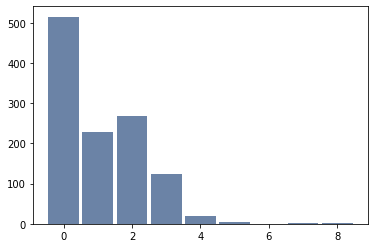

In [33]:
thinkplot.Hist(high_hist)

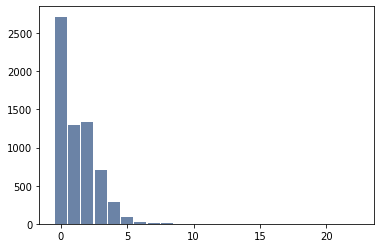

In [34]:
thinkplot.Hist(others_hist)

Find the largest parities for high income respondents.

In [35]:
# Solution goes here
high.parity.describe()

count    1160.000000
mean        1.075862
std         1.176167
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: parity, dtype: float64

Compare the mean <tt>parity</tt> for high income respondents and others.

In [36]:
# Solution goes here
others.parity.describe()

count    6483.000000
mean        1.249576
std         1.423032
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        22.000000
Name: parity, dtype: float64

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [37]:
# Solution goes here
CohenEffectSize(high.parity, others.parity)

-0.1251185531466061

In [43]:
high_hist

Hist({0: 515, 2: 267, 1: 229, 3: 123, 4: 19, 5: 5, 8: 1, 7: 1})

In [44]:
sorted(high_hist, key=lambda x: high_hist[x])

[8, 7, 5, 4, 3, 1, 2, 0]

In [45]:
!python chap02soln.py

Mean
First babies 7.201094430437772
Others 7.325855614973262
Variance
First babies 2.0180273009157768
Others 1.9437810258964572
Difference in lbs -0.12476118453549034
Difference in oz -1.9961789525678455
Difference relative to mean (%age points) -1.7171423678372415
Cohen d -0.088672927072602
Mode of preg length 39
39 4693
40 1116
38 607
41 587
37 455
chap02soln.py: All tests passed.
